In [6]:
import pandas as pd
import numpy as np
import missingno as msno

train = pd.read_csv('C:/Users/s_liouxe/Desktop/주피터/ML/타이타닉/train.csv', index_col = 'PassengerId')
test = pd.read_csv('C:/Users/s_liouxe/Desktop/주피터/ML/타이타닉/test.csv', index_col = 'PassengerId')
submission = pd.read_csv("C:/Users/s_liouxe/Desktop/주피터/ML/타이타닉/gender_submission.csv")

submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [8]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [9]:
train.shape, test.shape
# train에는 

((891, 11), (418, 10))

In [10]:
# 피처 요약본 만들기
def resumetable(df):
    print(f'데이터셋 형상 : {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
#     summary = summary.reset_index()
    summary = summary.rename(columns = {'index':'피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
#     for col in df.columns:
#         if 'bin' in col or col == 'target':
#             summary.loc[col, '데이터 종류'] = '이진형'
#         elif 'cat' in col:
#             summary.loc[col, '데이터 종류'] = '명목형'
#         elif df[col].dtype == float:
#             summary.loc[col, '데이터 종류'] = '연속형'
#         elif df[col].dtype == int:
#             summary.loc[col, '데이터 종류'] = '순서형'
    return summary
resumetable(train)

데이터셋 형상 : (891, 11)


,데이터 타입,결측값 개수,고윳값 개수
Survived,int64,0,2
Pclass,int64,0,3
Name,object,0,891
Sex,object,0,2
Age,float64,177,88
SibSp,int64,0,7
Parch,int64,0,7
Ticket,object,0,681
Fare,float64,0,248
Cabin,object,687,147


<AxesSubplot:>

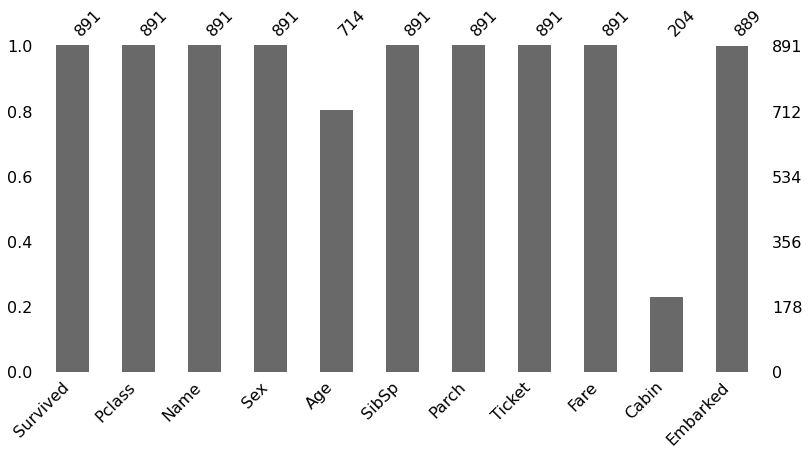

In [11]:
msno.bar(df=train.iloc[:], figsize=(13, 6))

In [13]:
# Cabin 수가 적어서 어떤 데이터인지 살펴 보고자 함

In [15]:
print(train['Cabin'].value_counts())
train['Cabin'].unique()

G6             4
C23 C25 C27    4
B96 B98        4
F2             3
E101           3
              ..
A36            1
A6             1
C50            1
E63            1
C49            1
Name: Cabin, Length: 147, dtype: int64


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [16]:
# 돈을 안 내서 누락인지, 아님 냈는데 누락된 건지 모르겠음
train[train['Cabin'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


In [28]:
check_ticket = pd.DataFrame(train['Ticket'].value_counts())
print("티켓 종류 및 개수 :", check_ticket)

# 티켓 소지자가 2가 넘는 티켓 이름 출력
lst = check_ticket[check_ticket['Ticket']>=2]
lst.count()
a = lst.index.to_list()
# 이 ticket이 같이 묶이는 42명이 뭔지 알아야 할 듯

print("티켓 소지자가 2가 넘는 티켓 개수 : ", len(a))

티켓 종류 및 개수 :               Ticket
347082             7
1601               7
CA. 2343           7
3101295            6
CA 2144            6
...              ...
350036             1
F.C.C. 13528       1
3101276            1
244270             1
223596             1

[681 rows x 1 columns]
티켓 소지자가 2가 넘는 티켓 개수 :  134


In [36]:
# a에 해당하는 사람들을 출력
check = train[train['Ticket'].isin(a)]

# 이 중 parch와 sibSp가 zero인 사람 출력
check_zero = check[(check['Parch'] == 0) & (check['SibSp'] == 0)]
check_zero['Ticket'].value_counts()
check_zero

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5000,NaN,S
75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
80,1,3,"Dowdell, Miss. Elizabeth",female,30.0,0,0,364516,12.4750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
842,0,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.5000,NaN,S


75명이나 있음.... 이 사람들은 왜 같은 Ticket 번호를 가지고 있는지 모르겠음

In [43]:
train['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [44]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [69]:
train_n = train.copy()
test_n = test.copy()

In [72]:
train_n['SibSp'] = train_n['SibSp'].apply(lambda x : 1 if x >= 1 else 0)
train_n['Parch'] = train_n['Parch'].apply(lambda x : 1 if x >= 1 else 0)
train_n

test_n['SibSp'] = test_n['SibSp'].apply(lambda x : 1 if x >= 1 else 0)
test_n['Parch'] = test_n['Parch'].apply(lambda x : 1 if x >= 1 else 0)


In [73]:
train_n['SibSp'].value_counts()

0    608
1    283
Name: SibSp, dtype: int64

In [81]:
test_n

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,
892,34.5,0,0,7.8292,0,1,0,1,0,0,0,1
893,47.0,1,0,7.0000,1,0,0,0,1,0,0,1
894,62.0,0,0,9.6875,0,1,0,1,0,0,1,0
895,27.0,0,0,8.6625,0,1,0,0,1,0,0,1
896,22.0,1,1,12.2875,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,0,0,8.0500,0,1,0,0,1,0,0,1
1306,39.0,0,0,108.9000,1,0,1,0,0,1,0,0
1307,38.5,0,0,7.2500,0,1,0,0,1,0,0,1


In [77]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
# 불필요한 변수 삭제 / 이름 : 고유값, Cabin : 결측값이 많음
train_n = train_n.drop(columns = ['Name', 'Cabin', 'Ticket'])
test_n = test_n.drop(columns = ['Name', 'Cabin', 'Ticket'])

KeyError: "['Name' 'Cabin' 'Ticket'] not found in axis"

In [79]:
# 명목형 변수에 대해 더미변수 생성
train_n = pd.get_dummies(data = train_n, columns = ['Sex', 'Embarked', 'Pclass'])
test_n = pd.get_dummies(data = test_n, columns = ['Sex', 'Embarked', 'Pclass'])

KeyError: "None of [Index(['Sex', 'Embarked', 'Pclass'], dtype='object')] are in the [columns]"

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [110]:
all_data = pd.concat([train_n, test_n])
all_data = all_data.fillna(all_data.mean())

num_train = len(train_n)

X_train = all_data[:num_train]
X_test = all_data[num_train:]

y = train_n['Survived']

In [111]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y, test_size=0.1, stratify=y, random_state=10)

In [112]:
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

<AxesSubplot:>

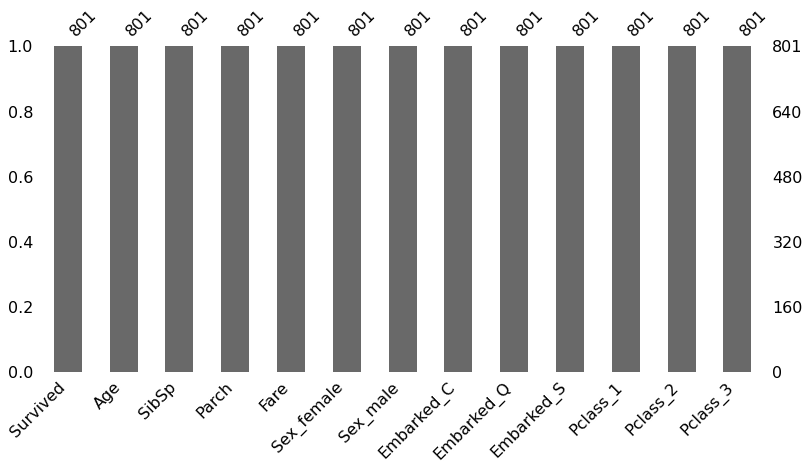

In [113]:
msno.bar(df=X_train.iloc[:], figsize=(13, 6))

In [114]:
logistic_model.predict_proba(X_valid)

array([[0.98926367, 0.01073633],
       [0.96600943, 0.03399057],
       [0.97749282, 0.02250718],
       [0.98448294, 0.01551706],
       [0.99156816, 0.00843184],
       [0.9892465 , 0.0107535 ],
       [0.02249347, 0.97750653],
       [0.02381192, 0.97618808],
       [0.99361486, 0.00638514],
       [0.97827929, 0.02172071],
       [0.98363468, 0.01636532],
       [0.9914973 , 0.0085027 ],
       [0.01486948, 0.98513052],
       [0.9914891 , 0.0085109 ],
       [0.99107824, 0.00892176],
       [0.03092773, 0.96907227],
       [0.99149196, 0.00850804],
       [0.01709941, 0.98290059],
       [0.01053384, 0.98946616],
       [0.99289416, 0.00710584],
       [0.99114974, 0.00885026],
       [0.00881721, 0.99118279],
       [0.00730139, 0.99269861],
       [0.06857061, 0.93142939],
       [0.06108173, 0.93891827],
       [0.98004669, 0.01995331],
       [0.0309098 , 0.9690902 ],
       [0.98715445, 0.01284555],
       [0.03393709, 0.96606291],
       [0.01532916, 0.98467084],
       [0.

In [115]:
logistic_model.predict(X_valid)

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [99]:
y_valid_preds = logistic_model.predict_proba(X_valid)[:, 1]

from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_valid, y_valid_preds)

print(f'검증 데이터 ROC AUC : {roc_auc:4f}')

검증 데이터 ROC AUC : 1.000000


In [116]:
print(y_valid)
print(y_valid_preds)

PassengerId
799    0
420    0
611    0
667    0
94     0
      ..
146    0
887    0
116    0
860    0
194    1
Name: Survived, Length: 90, dtype: int64
[0.01073633 0.03399057 0.02250718 0.01551706 0.00843184 0.0107535
 0.97750653 0.97618808 0.00638514 0.02172071 0.01636532 0.0085027
 0.98513052 0.0085109  0.00892176 0.96907227 0.00850804 0.98290059
 0.98946616 0.00710584 0.00885026 0.99118279 0.99269861 0.93142939
 0.93891827 0.01995331 0.9690902  0.01284555 0.96606291 0.98467084
 0.01381779 0.98533537 0.00920497 0.00794409 0.9945164  0.01709374
 0.01005179 0.03935324 0.0184657  0.03191062 0.00983005 0.97939575
 0.01981665 0.01390191 0.01380452 0.93906535 0.95945712 0.05745245
 0.99293422 0.02935216 0.00851456 0.98996243 0.01094179 0.03095372
 0.9935754  0.99480708 0.00851456 0.03637472 0.00961498 0.97506955
 0.98228388 0.01050196 0.98836883 0.96068062 0.01825403 0.01572758
 0.03383759 0.98155657 0.01075363 0.01046411 0.00866896 0.97940308
 0.97939575 0.99388967 0.00851456 0.99355884 0

In [89]:
y_preds = logistic_model.predict(X_test)[:]
y_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,